In [2]:
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from matplotlib import colors

In [ ]:
def texture_detect(interest_gray=[]):


C:\Users\Lennart Pc\AppData\Local\Temp\ipykernel_14204\2591099242.py:34: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)
C:\Users\Lennart Pc\AppData\Local\Temp\ipykernel_14204\2591099242.py:60: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


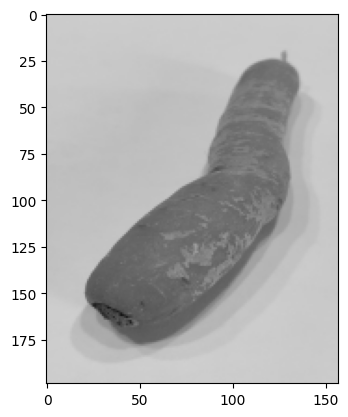

In [5]:
Adresse="D:/Dokumente/Master-Studium/Semester3/KI_Projekt/Bilderdrive/Karotte/karotte_(66).jpg"
#Adresse="D:/Dokumente/Master-Studium/Semester3/KI_Projekt/Bilderdrive/Zwiebel/zwiebel_(100).jpg"
#Adresse="D:/Dokumente/Master-Studium/Semester3/KI_Projekt/Bilderdrive/Kartoffel/kartoffel_(42).jpg"
#Adresse="D:/Dokumente/Master-Studium/Semester3/KI_Projekt/Bilderdrive/Kartoffel_trieb/kartoffel_trieb_(30).jpeg"
img = cv2.imread(Adresse)
img = cv2.resize(img, dsize=(256, 256), interpolation=cv2.INTER_AREA)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#cv2.imshow("original",img)
#cv2.imshow("gray",gray)
ret, binary = cv2.threshold(gray,120, 256, cv2.ADAPTIVE_THRESH_GAUSSIAN_C)
#cv2.imshow("Binary image", binary)

            


edges=cv2.Canny(gray,50,200)
blank_image = np.zeros((256,256,3), np.uint8)
for i in range(len(edges)):
    for j in range(len(edges[i])):
        if edges[i][j] !=0:
            0
        


contour, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for i in contour:
    area=cv2.contourArea(i)

    if area >=100 and area <=10000:
         
        rect = cv2.minAreaRect(i)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        #cv2.drawContours(img,[box],0,(0,0,255),1)
        #print(i)
        if len(i) >=5:
            ellipse = cv2.fitEllipse(i)
            #cv2.ellipse(img,ellipse,(255,0,0),1)
    if area >=50:

        x,y,w,h = cv2.boundingRect(i)
        #cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0),1)
    
new_img=img[y-20:(y+h+20),x-20:(x+w+20)]

new_gray= cv2.cvtColor(new_img,cv2.COLOR_BGR2GRAY)
new_edges=cv2.Canny(new_gray,50,200)
ret, new_binary = cv2.threshold(new_gray, 120, 200, cv2.ADAPTIVE_THRESH_GAUSSIAN_C)

new_contour, hierarchy = cv2.findContours(new_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for i in new_contour:
    area=cv2.contourArea(i)
    
    if area >= 50:
         
        rect = cv2.minAreaRect(i)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        #cv2.drawContours(new_img,[i],0,(0,0,255),1)
        #cv2.drawContours(new_img,[box],0,(0,255,255),1)
        #print(i)
        if len(i) >=5:
            ellipse = cv2.fitEllipse(i)
            #cv2.ellipse(new_img,ellipse,(255,0,0),1)
            
    if area >=70:

        x,y,w,h = cv2.boundingRect(i)
        #cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0),1)
for i in range(len(edges)):
    for j in range(len(edges[i])):
        if edges[i][j] !=0:  
            0
            








img=cv2.cvtColor(new_gray,cv2.COLOR_BGR2RGB)
plt.imshow(img)







cv2.waitKey(0)
cv2.destroyAllWindows()